In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'tensorflow.python'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_dir="C:/Multiclass Fish Image Classification/Dataset.zip/images.cv_jzk6llhf18tm3k0kyttxz/data"
val_dir="C:/Multiclass Fish Image Classification/Dataset.zip/images.cv_jzk6llhf18tm3k0kyttxz/data"
test_dir="C:/Multiclass Fish Image Classification/Dataset.zip/images.cv_jzk6llhf18tm3k0kyttxz/data"

In [4]:
image_height=224
image_width=224
batch_size=32

In [6]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)
# Test data generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "D:/Amala New/Multiclass Fish Image Classification/data/train" ,          
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
# Load validation data
validation_generator = train_datagen.flow_from_directory(
    "D:/Amala New/Multiclass Fish Image Classification/data/val",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)
# Load test data
test_generator = test_datagen.flow_from_directory(
    "D:/Amala New/Multiclass Fish Image Classification/data/test",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4984 images belonging to 11 classes.
Found 215 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


animal fish: 877 images
animal fish bass: 24 images
fish sea_food black_sea_sprat: 456 images
fish sea_food gilt_head_bream: 453 images
fish sea_food hourse_mackerel: 459 images
fish sea_food red_mullet: 464 images
fish sea_food red_sea_bream: 457 images
fish sea_food sea_bass: 431 images
fish sea_food shrimp: 461 images
fish sea_food striped_red_mullet: 438 images
fish sea_food trout: 464 images


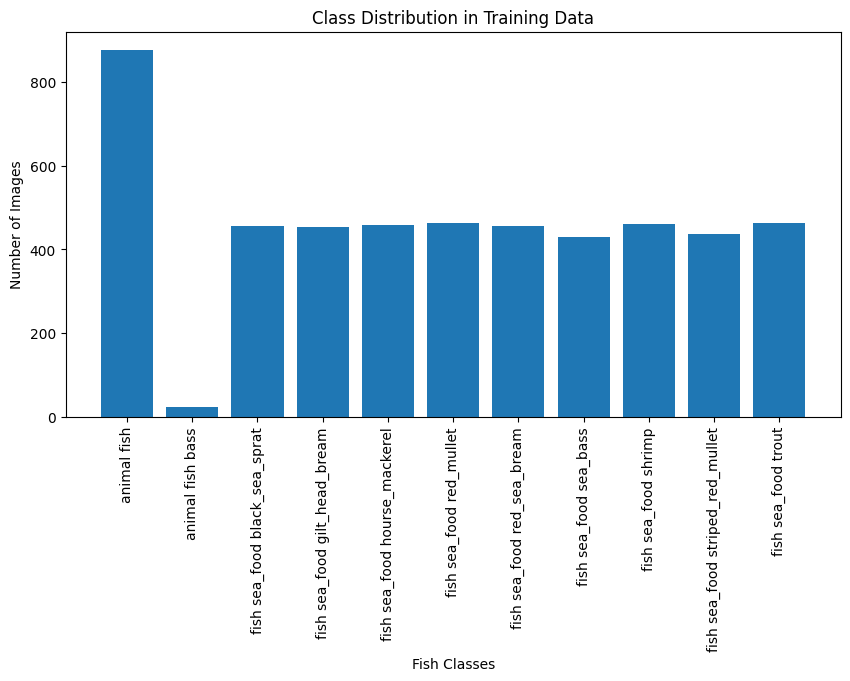

In [7]:
class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

unique, counts = np.unique(class_counts, return_counts=True)
for label, count in zip(unique, counts):
    print(f"{class_labels[label]}: {count} images")

plt.figure(figsize=(10,5))
plt.bar(class_labels, counts)
plt.xticks(rotation=90)
plt.xlabel("Fish Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Data")
plt.show()

In [8]:
# Identify small classes (example threshold <50)
small_classes = [label for label, count in zip(unique, counts) if count < 50]
print("Small classes:", [class_labels[i] for i in small_classes])

Small classes: ['animal fish bass']


In [9]:
# Define Custom CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,395 (84.87 MB)

 Trainable params: 22,247,947 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
#Model CNN 
epochs = 20

history = model.fit(
    train_generator,     
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,   
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs 
)

model.save('Custom CNN/custom_cnn_model.h5')
model.save('Custom CNN/custom_cnn_model.keras')

cnn_loss, cnn_acc = model.evaluate(validation_generator)
print(f"Custom CNN Accuracy: {cnn_acc*100:.2f}%")

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.2468 - loss: 5.0096 - val_accuracy: 0.1719 - val_loss: 53.2688
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.1250 - loss: 3.4307 - val_accuracy: 0.1719 - val_loss: 56.2181
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.2334 - loss: 2.3290 - val_accuracy: 0.2344 - val_loss: 10.4088
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.2188 - loss: 2.0770 - val_accuracy: 0.1979 - val_loss: 10.7011
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.2456 - loss: 2.1616 - val_accuracy: 0.2083 - val_loss: 6.7135
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2188 - loss: 2.1056 - val_accuracy: 0.2552 - val_loss: 6.0318
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.2712 - loss: 2.0702 - val_accuracy: 0.3281 - val_loss: 2.0958
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3125 - loss: 1.8321 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - accuracy: 0.2698 - loss: 2.0761
Custom CNN Accuracy: 26.98%


In [10]:
# Model VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

VGG_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = VGG_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=VGG_base_model.input, outputs=output)

for layer in VGG_base_model.layers[:-4]:
    layer.trainable = False

model_vgg.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('VGG16_best.keras', monitor='val_accuracy', save_best_only=True)

history_vgg = model_vgg.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[early_stop, checkpoint]
)

model_vgg.save('VGG16_final.h5')

model_vgg.save('VGG16_final.keras')

loss, acc = model_vgg.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")


Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1659s 11s/step - accuracy: 0.2739 - loss: 2.1175 - val_accuracy: 0.6374 - val_loss: 1.5289
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1082s 7s/step - accuracy: 0.5764 - loss: 1.2933 - val_accuracy: 0.8074 - val_loss: 0.8135
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 6731s 43s/step - accuracy: 0.7520 - loss: 0.7863 - val_accuracy: 0.8944 - val_loss: 0.4714
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1268s 8s/step - accuracy: 0.8367 - loss: 0.5406 - val_accuracy: 0.9371 - val_loss: 0.3191
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2827s 18s/step - accuracy: 0.8826 - loss: 0.4071 - val_accuracy: 0.9492 - val_loss: 0.2444


39/39 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.9476 - loss: 0.2467
Validation Accuracy: 94.76%


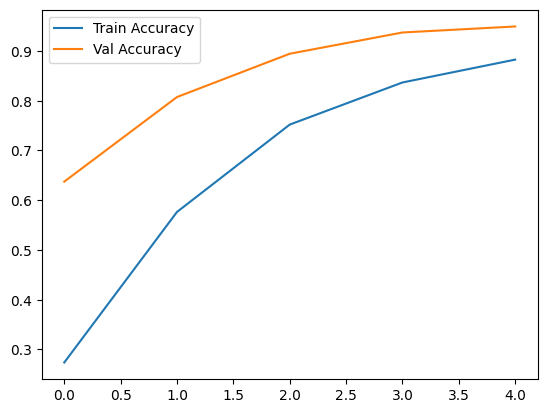

In [11]:
import matplotlib.pyplot as plt

plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [19]:
# Model ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

ResNet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = ResNet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=ResNet_base.input, outputs=output)

for layer in ResNet_base.layers[:-10]:
    layer.trainable = False

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('ResNet50_best.keras', monitor='val_accuracy', save_best_only=True)

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_resnet.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_resnet.save('ResNet50_final.keras')
model_resnet.save('ResNet50_final.h5')

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.1611 - loss: 2.3735 - val_accuracy: 0.1765 - val_loss: 2.3797
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 715s 5s/step - accuracy: 0.2354 - loss: 2.1246 - val_accuracy: 0.1797 - val_loss: 2.1564
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.2937 - loss: 1.9923 - val_accuracy: 0.3167 - val_loss: 1.9372
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.3196 - loss: 1.9198 - val_accuracy: 0.3586 - val_loss: 1.8749
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 394s 3s/step - accuracy: 0.3579 - loss: 1.8497 - val_accuracy: 0.3965 - val_loss: 1.7775
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 401s 3s/step - accuracy: 0.3678 - loss: 1.8114 - val_accuracy: 0.4182 - val_loss: 1.7299
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 407s 3s/step - accuracy: 0.3967 - loss: 1.7479 - val_accuracy: 0.3973 - val_loss: 1.7587
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.4057 - loss: 1.7174 - val_accu

In [10]:
# Model MobileNet
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

MobileNet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = MobileNet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_mobilenet = Model(inputs=MobileNet_base.input, outputs=output)

for layer in MobileNet_base.layers[:-8]:
    layer.trainable = False

model_mobilenet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('MobileNet_best.keras', monitor='val_accuracy', save_best_only=True)

history_mobilenet = model_mobilenet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_mobilenet.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_mobilenet.save('MobileNet_final.keras')
model_mobilenet.save('MobileNet_final.h5')

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.2247 - loss: 2.3345 - val_accuracy: 0.4706 - val_loss: 1.6686
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 138s 885ms/step - accuracy: 0.4685 - loss: 1.6004 - val_accuracy: 0.7357 - val_loss: 1.1288
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 140s 896ms/step - accuracy: 0.6106 - loss: 1.2366 - val_accuracy: 0.8469 - val_loss: 0.8235
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 146s 932ms/step - accuracy: 0.7231 - loss: 0.9614 - val_accuracy: 0.9001 - val_loss: 0.6335
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 149s 951ms/step - accuracy: 0.7659 - loss: 0.8047 - val_accuracy: 0.9307 - val_loss: 0.4888
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 152s 972ms/step - accuracy: 0.8192 - loss: 0.6651 - val_accuracy: 0.9388 - val_loss: 0.4062
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 146s 936ms/step - accuracy: 0.8401 - loss: 0.5857 - val_accuracy: 0.9460 - val_loss: 0.3352
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 141s 904ms/step - accuracy: 0.8664 - lo

In [11]:
# Model InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = Inception_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_inception = Model(inputs=Inception_base.input, outputs=output)

for layer in Inception_base.layers[:-20]:
    layer.trainable = False 

model_inception.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('InceptionV3_best.keras', monitor='val_accuracy', save_best_only=True)

history_inception = model_inception.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_inception.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_inception.save('InceptionV3_final.keras')
model_inception.save('InceptionV3_final.h5')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.3658 - loss: 1.9379 - val_accuracy: 0.7470 - val_loss: 1.3331
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.6772 - loss: 1.2286 - val_accuracy: 0.8509 - val_loss: 0.8843
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.7737 - loss: 0.8941 - val_accuracy: 0.8936 - val_loss: 0.6074
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.8222 - loss: 0.6990 - val_accuracy: 0.9122 - val_loss: 0.4744
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.8515 - loss: 0.5806 - val_accuracy: 0.9218 - val_loss: 0.3971
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.8686 - loss: 0.4943 - val_accuracy: 0.9291 - val_loss: 0.3353
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.8929 - loss: 0.4299 - val_accuracy: 0.9371 - val_loss: 0.2873
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 239s 

In [12]:
# Model EfficientNetV2B0
import scipy
from tensorflow.keras.applications import EfficientNetV2B0 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

effnet_v2_base = EfficientNetV2B0(
    weights='imagenet',       
    include_top=False,        
    input_shape=(224, 224, 3) 
)

x = effnet_v2_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_effnet_v2 = Model(inputs=effnet_v2_base.input, outputs=output)

for layer in effnet_v2_base.layers[:-20]:
    layer.trainable = False

model_effnet_v2.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('EfficientNetV2B0_best.keras', monitor='val_accuracy', save_best_only=True)

history_effnet_v2 = model_effnet_v2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_effnet_v2.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_effnet_v2.save('EfficientNetV2B0_final.keras')
model_effnet_v2.save('EfficientNetV2B0_final.h5')

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 612s 25us/step
Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.1208 - loss: 2.4074 - val_accuracy: 0.1765 - val_loss: 2.3451
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 150s 964ms/step - accuracy: 0.1585 - loss: 2.3677 - val_accuracy: 0.1765 - val_loss: 2.3235
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 200s 951ms/step - accuracy: 0.1581 - loss: 2.3520 - val_accuracy: 0.1765 - val_loss: 2.3157
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 150s 960ms/step - accuracy: 0.1663 - loss: 2.3373 - val_accuracy: 0.1765 - val_loss: 2.3067
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 148s 946ms/step - accuracy: 0.1615 - loss: 2.3389 - val_accuracy: 0.1765 - val_loss: 2.3022
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 147s 943ms/step - accuracy: 0.1667 - loss: 2.3268 - val_accuracy: 0.1765 - val_loss: 2.2983
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 148s 950ms/step - accuracy: 0.1691 - loss: 2.3269 - val_accuracy: 0.1765 - val_loss: 2.2951
Epoch 8/10
156/156 ━━━━━━

In [11]:
from tensorflow.keras.models import load_model

model = load_model("Custom CNN/custom_cnn_model.keras")                
model_vgg = load_model("VGG16_final.keras")                            
model_resnet = load_model("ResNet50_final.keras")                      
model_mobilenet = load_model("MobileNet_final.keras")                  
model_inception = load_model("InceptionV3_final.keras")                
model_effnet_v2 = load_model("EfficientNetV2B0_final.keras")           

cnn_loss, cnn_accuracy = model.evaluate(test_generator)
print(f"Custom CNN Accuracy: {cnn_accuracy:.4f}")

vgg_loss, vgg_accuracy = model_vgg.evaluate(test_generator)
print(f"VGG16 Accuracy: {vgg_accuracy:.4f}")

resnet_loss, resnet_accuracy = model_resnet.evaluate(test_generator)
print(f"ResNet50 Accuracy: {resnet_accuracy:.4f}")

mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(test_generator)
print(f"MobileNet Accuracy: {mobilenet_accuracy:.4f}")

inception_loss, inception_accuracy = model_inception.evaluate(test_generator)
print(f"InceptionV3 Accuracy: {inception_accuracy:.4f}")

efficient_loss, efficient_accuracy = model_effnet_v2.evaluate(test_generator)
print(f"EfficientNetB0 Accuracy: {efficient_accuracy:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 430ms/step - accuracy: 0.3875 - loss: 1.6965
Custom CNN Accuracy: 0.3875
100/100 ━━━━━━━━━━━━━━━━━━━━ 435s 4s/step - accuracy: 0.9567 - loss: 0.2104
VGG16 Accuracy: 0.9567
100/100 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.5425 - loss: 1.4483
ResNet50 Accuracy: 0.5425
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 467ms/step - accuracy: 0.9805 - loss: 0.1599
MobileNet Accuracy: 0.9805
100/100 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9714 - loss: 0.1600
InceptionV3 Accuracy: 0.9714
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 551ms/step - accuracy: 0.1632 - loss: 2.2970
EfficientNetB0 Accuracy: 0.1632


In [20]:
from sklearn.metrics import classification_report
import numpy as np

In [16]:
# Custom CNN
test_generator.reset()
cnn_prob = model.predict(test_generator, verbose=0)
cnn_pred = np.argmax(cnn_prob, axis=1)
print("*** Custom CNN ***")
print(classification_report(test_generator.classes, cnn_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

*** Custom CNN ***
                                  precision    recall  f1-score   support

                     animal fish     0.8082    0.9808    0.8862       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.1829    0.0492    0.0775       305
   fish sea_food hourse_mackerel     0.1746    0.9371    0.2943       286
        fish sea_food red_mullet     0.7209    0.2131    0.3289       291
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       273
          fish sea_food sea_bass     0.0000    0.0000    0.0000       327
            fish sea_food shrimp     0.4929    0.7197    0.5851       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293
             fish sea_food trout     0.4000    0.5890    0.4765       292

                        accuracy                         0.3875      3187
                 

In [19]:
# VGG16
test_generator.reset()
vgg_prob = model_vgg.predict(test_generator, verbose=0)
vgg_pred = np.argmax(vgg_prob, axis=1)
print("*****VGG16 ****")
print(classification_report(test_generator.classes, vgg_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

*****VGG16 ****
                                  precision    recall  f1-score   support

                     animal fish     0.9755    0.9942    0.9848       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9252    0.9966    0.9596       298
   fish sea_food gilt_head_bream     0.9712    0.9934    0.9822       305
   fish sea_food hourse_mackerel     0.9927    0.9545    0.9733       286
        fish sea_food red_mullet     0.8166    0.9794    0.8906       291
     fish sea_food red_sea_bream     0.9926    0.9817    0.9871       273
          fish sea_food sea_bass     0.9813    0.9633    0.9722       327
            fish sea_food shrimp     0.9664    0.9965    0.9813       289
fish sea_food striped_red_mullet     0.9643    0.7372    0.8356       293
             fish sea_food trout     1.0000    0.9829    0.9914       292

                        accuracy                         0.9567      3187
                    

In [21]:
# ResNet50
test_generator.reset()
resnet_prob = model_resnet.predict(test_generator, verbose=0)
resnet_pred = np.argmax(resnet_prob, axis=1)
print("*** ResNet50 ***")
print(classification_report(test_generator.classes, resnet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

*** ResNet50 ***
                                  precision    recall  f1-score   support

                     animal fish     0.7366    0.8442    0.7867       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.5901    0.6376    0.6129       298
   fish sea_food gilt_head_bream     0.5592    0.3869    0.4574       305
   fish sea_food hourse_mackerel     0.4463    0.7552    0.5610       286
        fish sea_food red_mullet     0.5426    0.4811    0.5100       291
     fish sea_food red_sea_bream     0.6704    0.6630    0.6667       273
          fish sea_food sea_bass     0.4451    0.4832    0.4633       327
            fish sea_food shrimp     0.6867    0.7128    0.6995       289
fish sea_food striped_red_mullet     0.5098    0.0887    0.1512       293
             fish sea_food trout     0.6176    0.7192    0.6646       292

                        accuracy                         0.5912      3187
                   

In [24]:
# MobileNet
test_generator.reset()
mobilenet_prob = model_mobilenet.predict(test_generator, verbose=0)
mobilenet_pred = np.argmax(mobilenet_prob, axis=1)
print("*** MobileNet ***")
print(classification_report(test_generator.classes, mobilenet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

*** MobileNet ***
                                  precision    recall  f1-score   support

                     animal fish     0.9755    0.9942    0.9848       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9609    0.9899    0.9752       298
   fish sea_food gilt_head_bream     0.9868    0.9803    0.9836       305
   fish sea_food hourse_mackerel     0.9823    0.9720    0.9772       286
        fish sea_food red_mullet     0.9823    0.9553    0.9686       291
     fish sea_food red_sea_bream     0.9750    1.0000    0.9873       273
          fish sea_food sea_bass     0.9938    0.9817    0.9877       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     0.9564    0.9727    0.9645       293
             fish sea_food trout     0.9966    0.9932    0.9949       292

                        accuracy                         0.9805      3187
                  

In [27]:
# InceptionV3
test_generator.reset()
inception_prob = model_inception.predict(test_generator, verbose=0)
inception_pred = np.argmax(inception_prob, axis=1)
print("=== InceptionV3 ===")
print(classification_report(test_generator.classes, inception_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== InceptionV3 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9717    0.9904    0.9810       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9768    0.9899    0.9833       298
   fish sea_food gilt_head_bream     0.9525    0.9869    0.9694       305
   fish sea_food hourse_mackerel     0.9692    0.9895    0.9792       286
        fish sea_food red_mullet     0.9435    0.9759    0.9595       291
     fish sea_food red_sea_bream     1.0000    0.9853    0.9926       273
          fish sea_food sea_bass     0.9689    0.9541    0.9615       327
            fish sea_food shrimp     0.9931    0.9965    0.9948       289
fish sea_food striped_red_mullet     0.9564    0.8976    0.9261       293
             fish sea_food trout     0.9862    0.9795    0.9828       292

                        accuracy                         0.9714      3187
                

In [30]:
# EfficientNetB0
test_generator.reset()
efficient_prob = model_effnet_v2.predict(test_generator, verbose=0)
efficient_pred = np.argmax(efficient_prob, axis=1)
print("**** EfficientNetB0 ****")
print(classification_report(test_generator.classes, efficient_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

**** EfficientNetB0 ****
                                  precision    recall  f1-score   support

                     animal fish     0.1632    1.0000    0.2806       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000       305
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000       286
        fish sea_food red_mullet     0.0000    0.0000    0.0000       291
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       273
          fish sea_food sea_bass     0.0000    0.0000    0.0000       327
            fish sea_food shrimp     0.0000    0.0000    0.0000       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293
             fish sea_food trout     0.0000    0.0000    0.0000       292

                        accuracy                         0.1632      3187
           

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the confusion matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

class_names = list(test_generator.class_indices.keys())
y_true = test_generator.classes

# Custom CNN
plot_confusion_matrix(y_true, cnn_pred, class_names, "Confusion Matrix — Custom CNN")

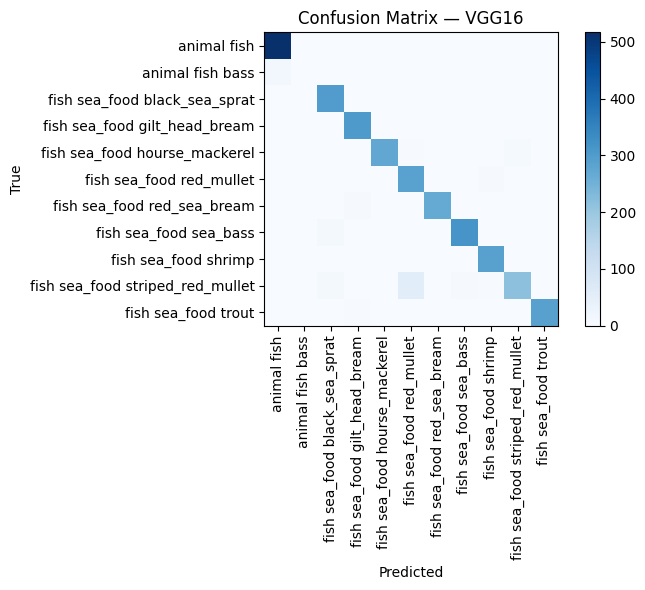

In [20]:
# VGG16
plot_confusion_matrix(y_true, vgg_pred, class_names, "Confusion Matrix — VGG16")

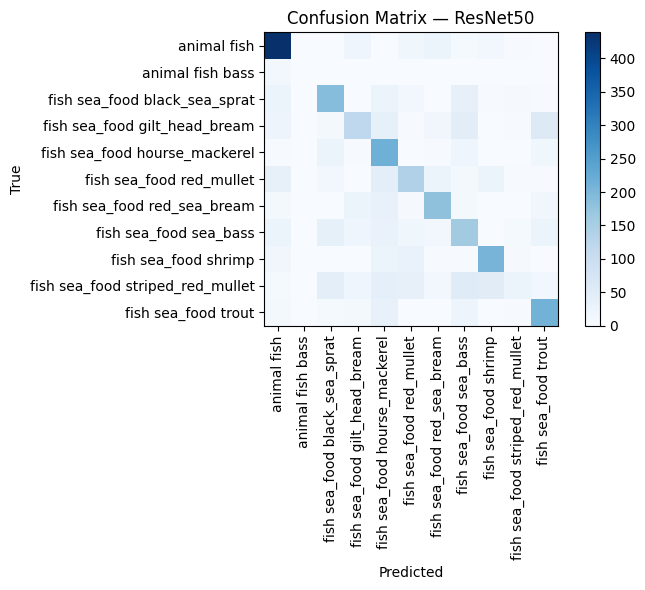

In [22]:
# ResNet50
plot_confusion_matrix(y_true, resnet_pred, class_names, "Confusion Matrix — ResNet50")

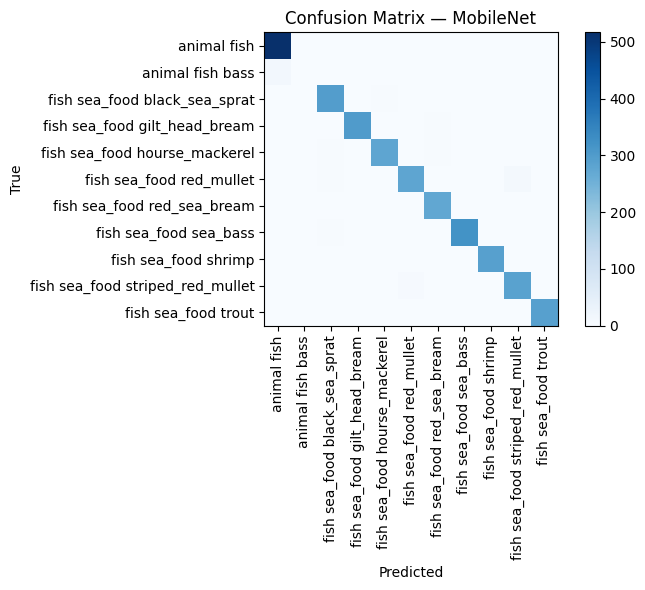

In [25]:

# MobileNet
plot_confusion_matrix(y_true, mobilenet_pred, class_names, "Confusion Matrix — MobileNet")

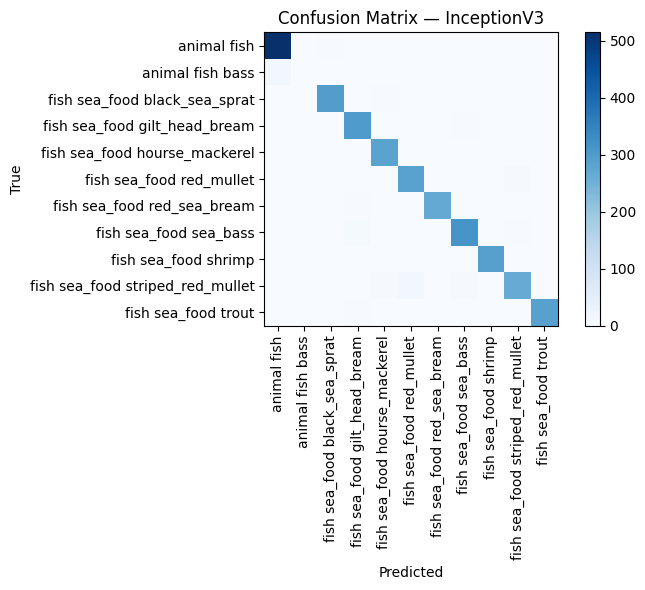

In [28]:
# InceptionV3
plot_confusion_matrix(y_true, inception_pred, class_names, "Confusion Matrix — InceptionV3")

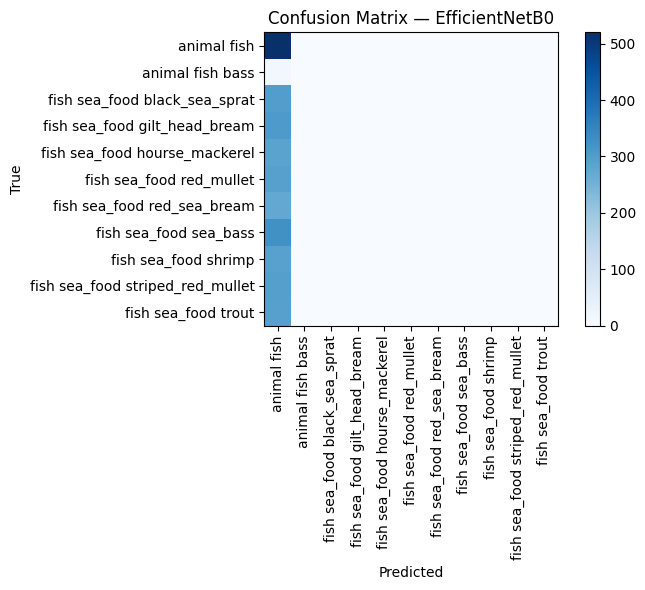

In [31]:
# EfficientNetB0
plot_confusion_matrix(y_true, efficient_pred, class_names, "Confusion Matrix — EfficientNetB0")